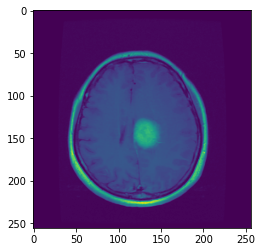

In [3]:
import numpy as np
import nibabel as nb
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
img = nb.load("/content/drive/MyDrive/Data/Brain_Mat_file/image.nii")
load_nii = np.array(img.dataobj)
plt.imshow(load_nii[1])

In [5]:
# # plt.imsave(load_nii,'/content/drive/MyDrive/download images for model/')
# import nibabel as nb

# # for i in range(3):
# plt.imshow(load_nii[1000], cmap=plt.cm.gray_r, interpolation="nearest")
# # plt.imshow(load_nii[1000])
# plt.savefig('/content/drive/MyDrive/download images for model/my_plot .png')

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

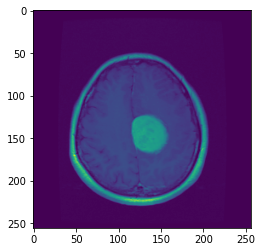

In [8]:
plt.imshow(load_nii[12])

In [9]:
load_nii.shape

(3064, 256, 256)

In [10]:
# labels =[]
# for i in range(708):
#   labels.append(0)
# for i in range(901):
#   labels.append(1)
# for i in range(930):
#   labels.append(2)
# len(labels)
# # labels =[]
# # for i in range(708):
# #   labels.append(0)
# # for i in range(708):
# #   labels.append(1)
# # for i in range(708):
# #   labels.append(2)
# # len(labels)
labels =[]
for i in range(708):
  labels.append(0)
for i in range(1426):
  labels.append(1)
for i in range(930):
  labels.append(2)
len(labels)

3064

In [11]:
Data = np.array(load_nii)
labels = np.array(labels)

print(Data.dtype)
print(labels.dtype)
len(Data)

int16
int64


3064

In [12]:
# data=[]
# for i in range(len(Data)):
#   if(i>1416 and i<2134 and i>2842):
#     continue
#   data.append(Data[i])

In [13]:
# len(data)
# Data=np.array(data)

In [14]:
Data.shape,labels.shape

((3064, 256, 256), (3064,))

In [15]:
# from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

# to calculate accuracy
from sklearn.metrics import accuracy_score

# loading the dataset
# (X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test, y_train, y_test = train_test_split(Data, labels,test_size=0.20, random_state=344)


# building the input vector from the 28x28 pixels
X_train = X_train.reshape(X_train.shape[0], 256, 256, 1)
X_test = X_test.reshape(X_test.shape[0], 256, 256, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255
# 
# one-hot encoding using keras' numpy-related utilities
n_classes = 3
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)


Shape before one-hot encoding:  (2451,)
Shape after one-hot encoding:  (2451, 3)


In [16]:
del Data
# del data
del load_nii


In [26]:
# ImageDataGenerator transforms each image in the batch by a series of random translations, rotations, etc.
datagen = ImageDataGenerator(
    rotation_range=90,                        
    # width_shift_range=0.05,
    # height_shift_range=0.05,
    horizontal_flip=True)

# After you have created and configured your ImageDataGenerator, you must fit it on your data.
datagen.fit(X_train)

In [27]:
# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(256,256,1)))
model.add(MaxPool2D(pool_size=(1,1)))

model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'))
model.add(MaxPool2D(pool_size=(1,1)))

model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer


#new
model.add(Dense(100, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.05))
# model.add(Dense(1000, activation='relu'))
#new end
model.add(Dense(500, activation='relu'))
#new end
model.add(Dropout(0.05))

model.add(Dense(250, activation='relu'))

# output layer
model.add(Dense(3, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
# cnn3 = Sequential()
# cnn3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(256,256,1)))))
# cnn3.add(MaxPooling2D((2, 2)))
# cnn3.add(Dropout(0.25))

# cnn3.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# cnn3.add(MaxPooling2D(pool_size=(2, 2)))
# cnn3.add(Dropout(0.25))

# cnn3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# cnn3.add(Dropout(0.4))
# 9

# cnn3.add(Flatten())

# cnn3.add(Dense(128, activation='relu'))
# cnn3.add(Dropout(0.3))
# cnn3.add(Dense(3 activation='softmax'))
# cnn1.compile(loss='categorical_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

In [28]:
# training the model for 10 epochs
history = model.fit(datagen.flow(X_train, Y_train, batch_size=32), epochs=200,  validation_data=(X_test, Y_test))

Epoch 1/200
77/77 [==============================] - 18s 219ms/step - loss: 1.9834 - accuracy: 0.6471 - val_loss: 0.7059 - val_accuracy: 0.6427
Epoch 2/200
77/77 [==============================] - 16s 210ms/step - loss: 0.6349 - accuracy: 0.7071 - val_loss: 0.5479 - val_accuracy: 0.7390
Epoch 3/200
77/77 [==============================] - 16s 210ms/step - loss: 0.5864 - accuracy: 0.7311 - val_loss: 0.5094 - val_accuracy: 0.7700
Epoch 4/200
77/77 [==============================] - 16s 208ms/step - loss: 0.5206 - accuracy: 0.7605 - val_loss: 0.4870 - val_accuracy: 0.7798
Epoch 5/200
77/77 [==============================] - 17s 225ms/step - loss: 0.4949 - accuracy: 0.7809 - val_loss: 0.5005 - val_accuracy: 0.7732
Epoch 6/200
77/77 [==============================] - 16s 209ms/step - loss: 0.4814 - accuracy: 0.7801 - val_loss: 0.4460 - val_accuracy: 0.7912
Epoch 7/200
77/77 [==============================] - 16s 208ms/step - loss: 0.4563 - accuracy: 0.7911 - val_loss: 0.4132 - val_accuracy:

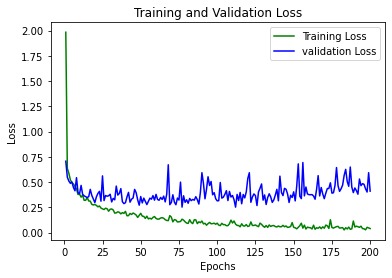

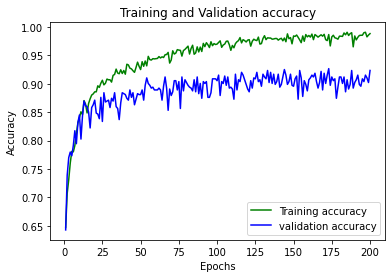

In [29]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,len(loss_train) + 1)
plt.plot(epochs, loss_train, 'g', label='Training Loss')
plt.plot(epochs, loss_val, 'b', label='validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1,len(train_acc)+1)
plt.plot(epochs, train_acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [30]:
model.evaluate(X_test, Y_test)

20/20 [==============================] - 1s 53ms/step - loss: 0.4099 - accuracy: 0.9233


[0.409872829914093, 0.9233279228210449]

In [ ]:
from keras.models import load_model,save_model

In [ ]:
model.save('/content/drive/MyDrive/Data/new_Model')

In [31]:
y_predicted = model.predict(X_test)

In [32]:
print(np.argmax(y_predicted[12]))
print(Y_test[12])
print(y_test[12])



2
[0. 0. 1.]
2


In [ ]:
# _, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))
# for ax, image, prediction in zip(axes, X_test, y_predicted):
#     ax.set_axis_off()
#     image = image.reshape(256, 256)
#     ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
#     ax.set_title(f"Prediction: {np.argmax(prediction)} Actual: {Y_test}")

In [33]:
import pandas as pd
y_pre = []
y_tst = []
for i in range(len(y_predicted)):
  y = np.argmax(y_predicted[i])
  y_pre.append(y)
  # if Y_test[i] == 100:
  #   t_tst.append(Y_test[i])
  # if Y_test[i] == 010:
  #   t_tst.append(Y_test[i])
  # elif Y_test[i] == 001:
  #   t_tst.append(Y_test[i])
for i in range(len(y_test)):
  y_tst.append(y_test[i])
# y_tst

In [34]:
from sklearn.metrics import  classification_report , ConfusionMatrixDisplay
print(classification_report(y_tst, y_pre))


              precision    recall  f1-score   support

           0       0.84      0.80      0.82       133
           1       0.94      0.94      0.94       303
           2       0.96      0.99      0.97       177

    accuracy                           0.92       613
   macro avg       0.91      0.91      0.91       613
weighted avg       0.92      0.92      0.92       613



Confusion matrix:
[[107  18   8]
 [ 19 284   0]
 [  1   1 175]]


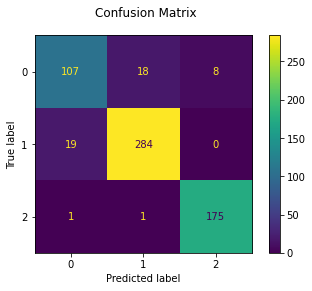

In [35]:
# import matrix from sklearn
from sklearn import metrics
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_tst, y_pre)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [ ]:
# saved_model_dir = '/content/drive/MyDrive/Data/save_model'
# tf.saved_model.save(model,saved_model_dir)

# converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
# tflite_model = converter.convert()

# with open('model.tflite','wb') as f: #open a model.tflite and if doesn't exists than create it
#   f.write(tflite_model)